In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [193]:
housing = pd.read_csv("./data/housing.csv")
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [194]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [195]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [196]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [197]:
X_train, X_test, y_train, y_test = train_test_split(
    housing.drop(columns="median_house_value"), # features
    housing["median_house_value"], # target
    stratify=pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5]),
    test_size=0.2, random_state=42
    )

# Obtener X_train_imputed a partir de X_train


In [198]:

null_rows_idx = X_train.isnull().any(axis=1) # índices de las filas con valores nulos
X_train.loc[null_rows_idx].head() # visualizamos las primeras filas con valores nulos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [199]:
k_value = np.sqrt(X_train.shape[0]).astype(int)
k_value

128

In [200]:
cat_encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
housing_cat_ohe = cat_encoder.fit_transform(X_train[["ocean_proximity"]])
housing_cat_ohe

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,0.0,1.0,0.0,0.0,0.0
15502,0.0,0.0,0.0,0.0,1.0
2908,0.0,1.0,0.0,0.0,0.0
14053,0.0,0.0,0.0,0.0,1.0
20496,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
15174,1.0,0.0,0.0,0.0,0.0
12661,0.0,1.0,0.0,0.0,0.0
19263,1.0,0.0,0.0,0.0,0.0
19140,1.0,0.0,0.0,0.0,0.0


In [201]:
X_train_temp = pd.concat([X_train.drop("ocean_proximity", axis=1), housing_cat_ohe], axis=1)
X_train_temp

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,0.0,1.0,0.0,0.0,0.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,0.0,0.0,0.0,0.0,1.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,0.0,1.0,0.0,0.0,0.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,0.0,0.0,0.0,0.0,1.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,1.0,0.0,0.0,0.0,0.0
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,0.0,1.0,0.0,0.0,0.0
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,1.0,0.0,0.0,0.0,0.0
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,1.0,0.0,0.0,0.0,0.0


In [202]:
scaler = StandardScaler().set_output(transform="pandas") # Para que el resultado sea un DataFrame
X_train_num_scaled = scaler.fit_transform(X_train_temp)
X_train_num_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,-0.941350,1.347438,0.027564,0.584777,0.635123,0.732602,0.556286,-0.893647,-0.887683,1.46218,-0.011006,-0.354889,-0.384217
15502,1.171782,-1.192440,-1.722018,1.261467,0.775677,0.533612,0.721318,1.292168,-0.887683,-0.68391,-0.011006,-0.354889,2.602693
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545045,-0.674675,-0.524407,-0.525434,-0.887683,1.46218,-0.011006,-0.354889,-0.384217
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.038567,-0.467617,-0.037297,-0.865929,-0.887683,-0.68391,-0.011006,-0.354889,2.602693
20496,0.437431,-0.635818,-0.131489,0.427179,0.269198,0.374060,0.220898,0.325752,1.126529,-0.68391,-0.011006,-0.354889,-0.384217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,1.251711,-1.220505,-1.165333,1.890456,1.686854,0.543471,1.341519,0.637374,1.126529,-0.68391,-0.011006,-0.354889,-0.384217
12661,-0.921368,1.342761,-1.085806,2.468471,2.149712,3.002174,2.451492,-0.557509,-0.887683,1.46218,-0.011006,-0.354889,-0.384217
19263,-1.570794,1.310018,1.538566,-0.895802,-0.894007,-0.862013,-0.865118,-0.365475,1.126529,-0.68391,-0.011006,-0.354889,-0.384217
19140,-1.560803,1.249211,-1.165333,0.249005,0.109257,-0.189747,0.010616,0.168261,1.126529,-0.68391,-0.011006,-0.354889,-0.384217


In [203]:
X_train_imputed = KNNImputer(n_neighbors=k_value).set_output(transform="pandas").fit_transform(X_train_num_scaled)

print(X_train_imputed.isna().any().any()) # Verificamos que no hay valores nulos
X_train_imputed

False


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,-0.941350,1.347438,0.027564,0.584777,0.635123,0.732602,0.556286,-0.893647,-0.887683,1.46218,-0.011006,-0.354889,-0.384217
15502,1.171782,-1.192440,-1.722018,1.261467,0.775677,0.533612,0.721318,1.292168,-0.887683,-0.68391,-0.011006,-0.354889,2.602693
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545045,-0.674675,-0.524407,-0.525434,-0.887683,1.46218,-0.011006,-0.354889,-0.384217
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.038567,-0.467617,-0.037297,-0.865929,-0.887683,-0.68391,-0.011006,-0.354889,2.602693
20496,0.437431,-0.635818,-0.131489,0.427179,0.269198,0.374060,0.220898,0.325752,1.126529,-0.68391,-0.011006,-0.354889,-0.384217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,1.251711,-1.220505,-1.165333,1.890456,1.686854,0.543471,1.341519,0.637374,1.126529,-0.68391,-0.011006,-0.354889,-0.384217
12661,-0.921368,1.342761,-1.085806,2.468471,2.149712,3.002174,2.451492,-0.557509,-0.887683,1.46218,-0.011006,-0.354889,-0.384217
19263,-1.570794,1.310018,1.538566,-0.895802,-0.894007,-0.862013,-0.865118,-0.365475,1.126529,-0.68391,-0.011006,-0.354889,-0.384217
19140,-1.560803,1.249211,-1.165333,0.249005,0.109257,-0.189747,0.010616,0.168261,1.126529,-0.68391,-0.011006,-0.354889,-0.384217


In [204]:
X_train_imputed.loc[null_rows_idx].head() # visualizamos las filas que tenían valores nulos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
1606,-1.251077,1.048079,-0.211016,0.151734,0.080575,-0.533051,0.343342,-0.494985,-0.887683,-0.68391,-0.011006,2.817783,-0.384217
10915,0.852065,-0.893080,1.299986,-0.167671,-0.046215,0.493276,0.005292,-0.239693,1.126529,-0.68391,-0.011006,-0.354889,-0.384217
19150,-1.560803,1.267921,-1.165333,-0.144756,-0.238985,-0.417421,-0.266212,-0.049654,1.126529,-0.68391,-0.011006,-0.354889,-0.384217
4186,0.672224,-0.705981,1.538566,-0.614744,-0.577098,-0.524088,-0.540378,0.216926,1.126529,-0.68391,-0.011006,-0.354889,-0.384217
16885,-1.410935,0.907754,-0.211016,0.307929,-0.165944,-0.246217,-0.045282,1.303035,-0.887683,-0.68391,-0.011006,-0.354889,2.602693


In [205]:
X_train_imputed.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,16512.0,-5.249246e-15,1.000030,-2.385075,-1.111200,0.532347,0.782126,2.630493
latitude,16512.0,2.811597e-16,1.000030,-1.449702,-0.794853,-0.645173,0.973239,2.951818
housing_median_age,16512.0,8.778508e-17,1.000030,-2.199176,-0.847227,0.027564,0.663775,1.856671
total_rooms,16512.0,-1.549148e-17,1.000030,-1.223624,-0.551612,-0.235480,0.242458,17.161559
total_bedrooms,16512.0,-4.504128e-04,0.998186,-1.291435,-0.581396,-0.246974,0.264351,13.752681
population,16512.0,6.454785e-19,1.000030,-1.269855,-0.569802,-0.229187,0.268290,30.711200
households,16512.0,-1.054282e-17,1.000030,-1.317625,-0.580305,-0.236932,0.279458,12.939008
median_income,16512.0,1.148414e-16,1.000030,-1.772289,-0.687150,-0.175515,0.456430,5.839873
ocean_proximity_<1H OCEAN,16512.0,5.508083e-17,1.000030,-0.887683,-0.887683,-0.887683,1.126529,1.126529
ocean_proximity_INLAND,16512.0,3.926661e-17,1.000030,-0.683910,-0.683910,-0.683910,1.462180,1.462180


# Obtener X_test_imputed a partir de X_test

In [206]:
# Repetimos el proceso anterior para llegar de x_test a x_test_imputed

null_rows_idx = X_test.isnull().any(axis=1) # índices de las filas con valores nulos
X_test.loc[null_rows_idx].head() # visualizamos las primeras filas con valores nulos

k_value = np.sqrt(X_test.shape[0]).astype(int)
k_value

cat_encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
housing_cat_ohe = cat_encoder.fit_transform(X_test[["ocean_proximity"]])
housing_cat_ohe

X_test_temp = pd.concat([X_test.drop("ocean_proximity", axis=1), housing_cat_ohe], axis=1)
X_test_temp

scaler = StandardScaler().set_output(transform="pandas") # Para que el resultado sea un DataFrame
X_test_num_scaled = scaler.fit_transform(X_test_temp)
X_test_num_scaled

X_test_imputed = KNNImputer(n_neighbors=k_value).set_output(transform="pandas").fit_transform(X_test_num_scaled)

print(X_test_imputed.isna().any().any()) # Verificamos que no hay valores nulos
X_test_imputed

X_test_imputed.loc[null_rows_idx].head() # visualizamos las filas que tenían valores nulos

X_test_imputed.describe().T

False


,count,mean,std,min,25%,50%,75%,max
longitude,4128.0,-5.060551e-16,1.000121,-2.305303,-1.111366,0.540247,0.779034,2.480394
latitude,4128.0,3.012233e-16,1.000121,-1.434482,-0.790574,-0.649572,0.981350,2.983577
housing_median_age,4128.0,8.606380e-17,1.000121,-2.184292,-0.838105,-0.046231,0.666456,1.854267
total_rooms,4128.0,-1.721276e-18,1.000121,-1.145347,-0.517819,-0.225584,0.205734,12.763000
total_bedrooms,4128.0,-3.567470e-05,0.996423,-1.207381,-0.547275,-0.237026,0.227248,12.971683
population,4128.0,-4.152578e-17,1.000121,-1.206024,-0.537071,-0.230685,0.255314,22.654063
households,4128.0,-6.153562e-17,1.000121,-1.247831,-0.556024,-0.229747,0.254150,13.670174
median_income,4128.0,4.647445e-17,1.000121,-1.782721,-0.695620,-0.179137,0.473314,5.933828
ocean_proximity_<1H OCEAN,4128.0,-1.721276e-17,1.000121,-0.905154,-0.905154,-0.905154,1.104784,1.104784
ocean_proximity_INLAND,4128.0,-5.680211e-17,1.000121,-0.673820,-0.673820,-0.673820,1.484076,1.484076


In [207]:
# Repetimos el proceso anterior para llegar de x_test a x_test_imputed

null_rows_idx = X_test.isnull().any(axis=1) # índices de las filas con valores nulos
X_test.loc[null_rows_idx].head() # visualizamos las primeras filas con valores nulos


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
11441,-117.98,33.73,18.0,3833.0,NaN,2192.0,996.0,3.4679,<1H OCEAN
19890,-119.15,36.29,18.0,1435.0,NaN,657.0,254.0,2.4281,INLAND
3912,-118.55,34.19,18.0,5862.0,NaN,3161.0,1280.0,3.1106,<1H OCEAN
8530,-118.35,33.90,31.0,1547.0,NaN,956.0,287.0,3.4698,<1H OCEAN
11311,-117.96,33.78,33.0,1520.0,NaN,658.0,242.0,4.8750,<1H OCEAN


In [208]:

k_value = np.sqrt(X_test.shape[0]).astype(int)
k_value


64

In [209]:

cat_encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
housing_cat_ohe = cat_encoder.fit_transform(X_test[["ocean_proximity"]])
housing_cat_ohe


,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
5241,1.0,0.0,0.0,0.0,0.0
17352,1.0,0.0,0.0,0.0,0.0
3505,1.0,0.0,0.0,0.0,0.0
7777,1.0,0.0,0.0,0.0,0.0
14155,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
12182,1.0,0.0,0.0,0.0,0.0
7275,1.0,0.0,0.0,0.0,0.0
17223,1.0,0.0,0.0,0.0,0.0
10786,1.0,0.0,0.0,0.0,0.0


In [210]:

X_test_temp = pd.concat([X_test.drop("ocean_proximity", axis=1), housing_cat_ohe], axis=1)
X_test_temp


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,1.0,0.0,0.0,0.0,0.0
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,1.0,0.0,0.0,0.0,0.0
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,1.0,0.0,0.0,0.0,0.0
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,1.0,0.0,0.0,0.0,0.0
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,1.0,0.0,0.0,0.0,0.0
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,1.0,0.0,0.0,0.0,0.0
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,1.0,0.0,0.0,0.0,0.0
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,1.0,0.0,0.0,0.0,0.0


In [211]:

scaler = StandardScaler().set_output(transform="pandas") # Para que el resultado sea un DataFrame
X_test_num_scaled = scaler.fit_transform(X_test_temp)
X_test_num_scaled


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
5241,0.575070,-0.696573,0.032956,1.602218,1.017175,0.614330,1.104803,2.358455,1.104784,-0.67382,-0.026968,-0.346723,-0.385462
17352,-0.434801,-0.334668,-0.362981,-0.285055,-0.534073,-0.495927,-0.556024,0.617359,1.104784,-0.67382,-0.026968,-0.346723,-0.385462
3505,0.545222,-0.635472,0.587268,-0.526772,-0.615486,-0.535191,-0.575650,0.284222,1.104784,-0.67382,-0.026968,-0.346723,-0.385462
7777,0.719338,-0.795274,0.508081,-0.441510,-0.494467,-0.314643,-0.511866,-0.308135,1.104784,-0.67382,-0.026968,-0.346723,-0.385462
14155,1.231735,-1.331081,0.745643,0.464824,0.141435,0.038734,0.255990,0.267724,-0.905154,-0.67382,-0.026968,-0.346723,2.594289
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12182,1.122291,-0.884575,-0.758918,-0.187856,-0.270031,-0.201863,-0.347501,-0.549633,1.104784,-0.67382,-0.026968,-0.346723,-0.385462
7275,0.649691,-0.757673,0.349706,-0.768916,-0.562678,-0.149232,-0.558477,-0.898470,1.104784,-0.67382,-0.026968,-0.346723,-0.385462
17223,-0.086570,-0.546171,1.141580,-0.386942,-0.457061,-0.656325,-0.372033,0.452440,1.104784,-0.67382,-0.026968,-0.346723,-0.385462
10786,0.813858,-0.926876,0.112144,-0.263313,-0.303036,-0.307125,-0.239559,0.565526,1.104784,-0.67382,-0.026968,-0.346723,-0.385462


In [212]:

X_test_imputed = KNNImputer(n_neighbors=k_value).set_output(transform="pandas").fit_transform(X_test_num_scaled)

print(X_test_imputed.isna().any().any()) # Verificamos que no hay valores nulos
X_test_imputed


False


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
5241,0.575070,-0.696573,0.032956,1.602218,1.017175,0.614330,1.104803,2.358455,1.104784,-0.67382,-0.026968,-0.346723,-0.385462
17352,-0.434801,-0.334668,-0.362981,-0.285055,-0.534073,-0.495927,-0.556024,0.617359,1.104784,-0.67382,-0.026968,-0.346723,-0.385462
3505,0.545222,-0.635472,0.587268,-0.526772,-0.615486,-0.535191,-0.575650,0.284222,1.104784,-0.67382,-0.026968,-0.346723,-0.385462
7777,0.719338,-0.795274,0.508081,-0.441510,-0.494467,-0.314643,-0.511866,-0.308135,1.104784,-0.67382,-0.026968,-0.346723,-0.385462
14155,1.231735,-1.331081,0.745643,0.464824,0.141435,0.038734,0.255990,0.267724,-0.905154,-0.67382,-0.026968,-0.346723,2.594289
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12182,1.122291,-0.884575,-0.758918,-0.187856,-0.270031,-0.201863,-0.347501,-0.549633,1.104784,-0.67382,-0.026968,-0.346723,-0.385462
7275,0.649691,-0.757673,0.349706,-0.768916,-0.562678,-0.149232,-0.558477,-0.898470,1.104784,-0.67382,-0.026968,-0.346723,-0.385462
17223,-0.086570,-0.546171,1.141580,-0.386942,-0.457061,-0.656325,-0.372033,0.452440,1.104784,-0.67382,-0.026968,-0.346723,-0.385462
10786,0.813858,-0.926876,0.112144,-0.263313,-0.303036,-0.307125,-0.239559,0.565526,1.104784,-0.67382,-0.026968,-0.346723,-0.385462


In [213]:

X_test_imputed.loc[null_rows_idx].head() # visualizamos las filas que tenían valores nulos


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
11441,0.779034,-0.879875,-0.838105,0.487845,0.874977,0.621014,1.193119,-0.203245,1.104784,-0.673820,-0.026968,-0.346723,-0.385462
19890,0.196990,0.323341,-0.838105,-0.534446,-0.490307,-0.661338,-0.627167,-0.756593,-0.905154,1.484076,-0.026968,-0.346723,-0.385462
3912,0.495474,-0.663672,-0.838105,1.352827,1.555779,1.430524,1.889832,-0.393388,1.104784,-0.673820,-0.026968,-0.346723,-0.385462
8530,0.594969,-0.799974,0.191331,-0.486699,-0.484256,-0.411551,-0.546211,-0.202234,1.104784,-0.673820,-0.026968,-0.346723,-0.385462
11311,0.788984,-0.856375,0.349706,-0.498209,-0.609710,-0.660502,-0.656606,0.545570,1.104784,-0.673820,-0.026968,-0.346723,-0.385462


In [214]:

X_test_imputed.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,4128.0,-5.060551e-16,1.000121,-2.305303,-1.111366,0.540247,0.779034,2.480394
latitude,4128.0,3.012233e-16,1.000121,-1.434482,-0.790574,-0.649572,0.981350,2.983577
housing_median_age,4128.0,8.606380e-17,1.000121,-2.184292,-0.838105,-0.046231,0.666456,1.854267
total_rooms,4128.0,-1.721276e-18,1.000121,-1.145347,-0.517819,-0.225584,0.205734,12.763000
total_bedrooms,4128.0,-3.567470e-05,0.996423,-1.207381,-0.547275,-0.237026,0.227248,12.971683
population,4128.0,-4.152578e-17,1.000121,-1.206024,-0.537071,-0.230685,0.255314,22.654063
households,4128.0,-6.153562e-17,1.000121,-1.247831,-0.556024,-0.229747,0.254150,13.670174
median_income,4128.0,4.647445e-17,1.000121,-1.782721,-0.695620,-0.179137,0.473314,5.933828
ocean_proximity_<1H OCEAN,4128.0,-1.721276e-17,1.000121,-0.905154,-0.905154,-0.905154,1.104784,1.104784
ocean_proximity_INLAND,4128.0,-5.680211e-17,1.000121,-0.673820,-0.673820,-0.673820,1.484076,1.484076


# Representación

## Usando la función plot_regression

In [215]:
def plot_regression(X, y, X_test = None, y_test = None, model = None):
    plt.scatter(X, y, color='blue', label='Train')
    if X_test is not None:
        plt.scatter(X_test, y_test, color='orange', label='Test')
    X_plot = pd.DataFrame(np.linspace(X.min(), X.max(), num=100), columns= X.columns)
    if model is not None:
        plt.plot(X_plot, model.predict(X_plot), color='red', label='Modelo')
    plt.xlabel("median_income")
    plt.ylabel("Precio $")
    if X_test is not None or model is not None:
        plt.legend()
    plt.show()

### Regresión lineal

In [216]:
model_linear = LinearRegression().fit(X_train_imputed[["median_income"]], y_train)

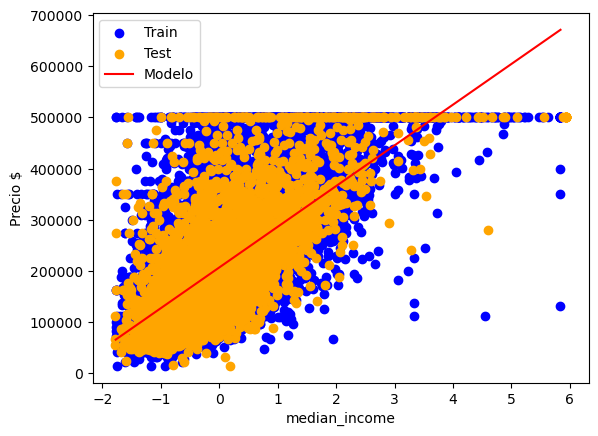

In [217]:
plot_regression(X_train_imputed[["median_income"]], y_train, X_test_imputed[["median_income"]], y_test, model_linear)

In [218]:
y_test_pred = model_linear.predict(X_test_imputed[["median_income"]])
mae_linear = mean_absolute_error(y_test, y_test_pred)
print("MAE Regresión lineal: ", mae_linear)

MAE Regresión lineal:  62003.524868136185


In [219]:
mae_linear_train = mean_absolute_error(y_train, model_linear.predict(X_train_imputed[["median_income"]]))
print("MAE Regresión lineal (train): ", mae_linear_train)

MAE Regresión lineal (train):  62810.836802889506


### Árbol de regresión

In [220]:
tree_reg = DecisionTreeRegressor().fit(X_train_imputed[["median_income"]], y_train)

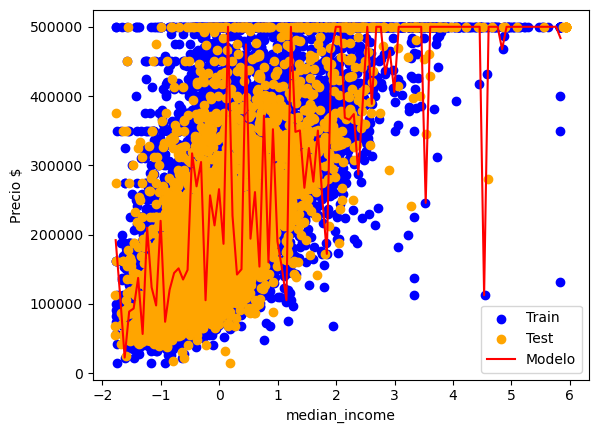

In [221]:
plot_regression(X_train_imputed[["median_income"]], y_train, X_test_imputed[["median_income"]], y_test, tree_reg)

In [222]:
print("MAE Árbol de decisión: ", mean_absolute_error(y_test, tree_reg.predict(X_test_imputed[["median_income"]])))
print("MAE Árbol de decisión (train): ", mean_absolute_error(y_train, tree_reg.predict(X_train_imputed[["median_income"]])))

MAE Árbol de decisión:  79998.83021664013
MAE Árbol de decisión (train):  24256.740727331355


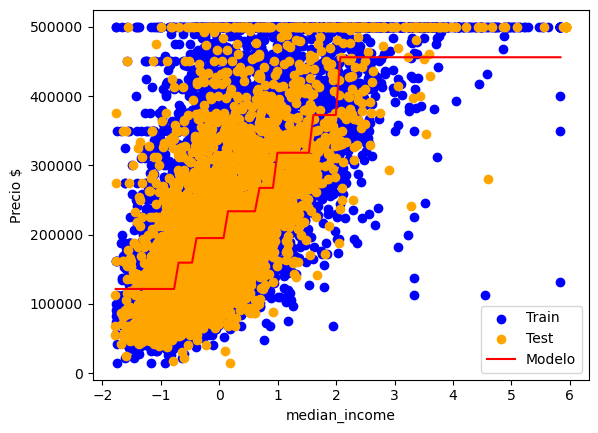

MAE Árbol de decisión:  61802.357440814376
MAE Árbol de decisión (train):  62521.43870808889


In [223]:
tree_reg = DecisionTreeRegressor(max_depth=3).fit(X_train_imputed[["median_income"]], y_train)
plot_regression(X_train_imputed[["median_income"]], y_train, X_test_imputed[["median_income"]], y_test, tree_reg)
print("MAE Árbol de decisión: ", mean_absolute_error(y_test, tree_reg.predict(X_test_imputed[["median_income"]])))
print("MAE Árbol de decisión (train): ", mean_absolute_error(y_train, tree_reg.predict(X_train_imputed[["median_income"]])))

## Usando plt.scatter

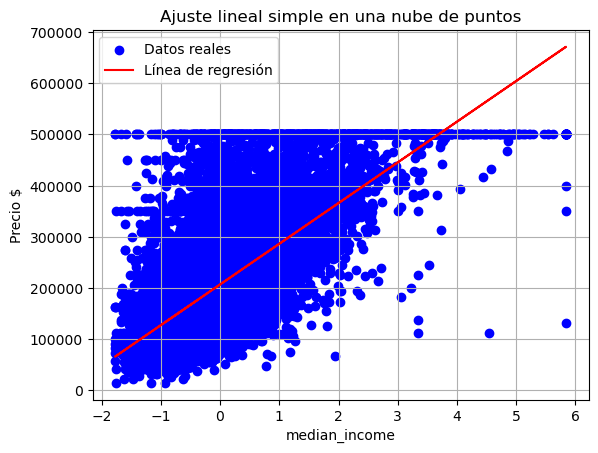

In [224]:
model_linear = LinearRegression().fit(X_train_imputed[["median_income"]], y_train)

plt.scatter(X_train_imputed[["median_income"]], y_train, c='blue', label='Datos reales')
plt.plot(X_train_imputed[["median_income"]], model_linear.predict(X_train_imputed[["median_income"]]), c='red', label=f'Línea de regresión')

plt.xlabel('median_income')  # Etiqueta del eje x
plt.ylabel('Precio $')  # Etiqueta del eje y
plt.title('Ajuste lineal simple en una nube de puntos')
plt.legend() # Mostrar la leyenda
plt.grid(True) # Agregar una cuadrícula 
plt.show() # Mostrar el gráfico